# AtlasReader

[`atlasreader`](https://github.com/miykael/atlasreader) is a Python interface that generats coordinate tables and region labels from statistical MRI images.

This notebook will show you how to install `atlasreader`, how to run the toolbox and what the different parameters allow you to do.


## Installing `atlasreader`

Provided you have `pip` at your disposal, installing `atlasreader` is as simple as this:

```bash
pip install atlasreader
```

If you want to install `atlasreader` directly from the source code, use the following code:

```bash
git clone https://github.com/miykael/atlasreader.git
cd atlasreader
python setup.py install
```

## Using `atlasreader`


### License terms of `atlasreader`

Before showcasing the toolbox, we want to point to the particular **license issue** that you need to consider when you are using `atlasreader`.

`atlasreader` itself is licensed under the BSD-3 license, but the included atlases that are used to lookup the coordinate labels are under their own license terms. For this reason, we ask you to inform yourself about the atlas specific license terms under [https://github.com/miykael/atlasreader/tree/master/atlasreader/data](https://github.com/miykael/atlasreader/tree/master/atlasreader/data) and to cite the corresponding papers should you use `atlasreader` in a publication.

We've included the following information message after every first module import, to make sure that users are aware about this issue:

    The Python package you are importing, `atlasreader`, is licensed under the
    BSD-3 license; however, the atlases it uses are separately licensed under more
    restrictive frameworks.
    By using `atlasreader`, you agree to abide by the license terms of the
    individual atlases. Information on these terms can be found online at:
    https://github.com/miykael/atlasreader/tree/master/atlasreader/data


### Citing atlasreader

If you use `atlasreader` in your publication, please cite the following paper:

    Markello R., Gale D., Herholz P., Whitaker K., & Notter M. P. (2019). AtlasReader: Quick generation of coordinate tables and region labels for statistical MRI images. The Journal of Open Source Software, ZZZ, YYY.

**TODO: This reference needs to be updated after paper is published. Don't forget to add the DOI and link to the paper.**

### Prepare an example file

`atlasreader` can either be run through the command line interface, or directly within Python. To showcase both of those examples, let's first import relevant plotting functions for this notebook.

In [1]:
%matplotlib inline
from nilearn.plotting import plot_glass_brain
from IPython.display import Image

Next, let's grab an example stat map. We'll use `nilearn` to grab a motor task stat map from [neurovault](https://neurovault.org/) and to threshold it at a value of 3 to create some clusters. Note that you'll need the most up to date version of `nilearn` in order to run `fetch_neurovault_motor_task()`.

In [2]:
# Get a stat map from neurovault using nilearn
from nilearn.datasets import fetch_neurovault_motor_task
motor_images = fetch_neurovault_motor_task()
stat_img = motor_images.images[0]

In [3]:
# Threshold image at a value of 3 to create clusters
from nilearn.image import threshold_img
stat_img = threshold_img(stat_img, threshold=3)

In [4]:
# Save the thresholded image into a NIfTI file
file_name = 'stat_img.nii.gz'
stat_img.to_filename(file_name)

And what does our example data look like?

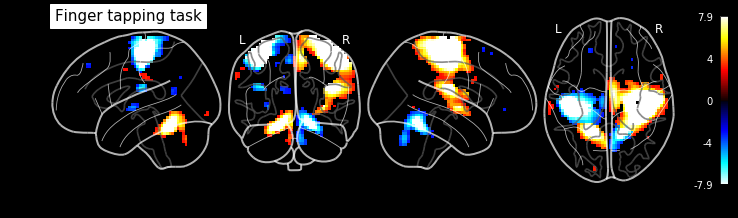

In [6]:
plot_glass_brain(file_name, black_bg=True, colorbar=True, plot_abs=False,
                 display_mode='lyrz', title='Finger tapping task');

Ok, so we can see that there are a few particular clusters, if we threshold the data at a value of 3. But how big are they and in which regions are they?

To answer these questions, you can use `atlasreader`. It gives you the opportunity to better understand where the peaks of those clusters are, over which regions the clusters extend, and much more. So, how is it done?

## Calling `atlasreader` from Python

If you want to run `atlasreader` directly in Python, just import the `create_output()` function, and you're good to go:

In [7]:
from atlasreader import create_output

The Python package you are importing, `atlasreader`, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using `atlasreader`, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



Great, so now we can run `atlasreader`. The only thing that we have to provide is our **stat map** (either the `file_name` or the image object) and the **cluster extent**, which specifies the minimum number of contiguous voxels required for a cluster to be considered for the analysis. For this example, let's set the `cluster_extent` to 5.

In [8]:
create_output(file_name, cluster_extent=5)

After execution, we get four different kind of files:

- An **overview figure** that shows the results within the whole brain at once
- For **each cluster**, an **informative figure** showing the sagittal, coronal and trasnveral plane centered at this center of the cluster
- A **csv file** containing relevant information about the **peak** of each cluster
- A **csv file** containing relevant information about each **cluster**

So, let's take a closer look at those outputs:

### Overview figure

The overview figure shows all clusters throught the brain, plotted on a glass brain plot. The name of file is the name of provided statistical image, but with the file ending `.png`

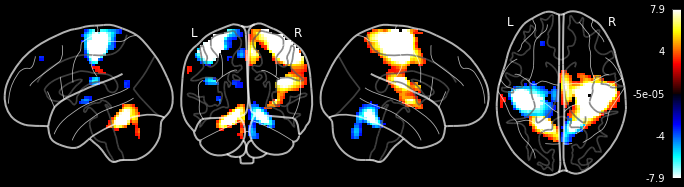

In [9]:
Image('stat_img.png')

### Informative cluster figure

`atlasreader` creates for each cluster an informative figure, showing the cluster center in the three anatomical planes: sagittal, coronal and trasnveral. The name of those files all end in `_clusterXY.png`, i.e. `_cluster01.png`, `_cluster02.png`, ...:

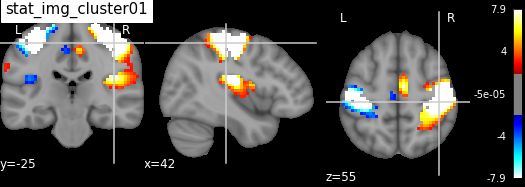

In [10]:
Image('stat_img_cluster01.png')

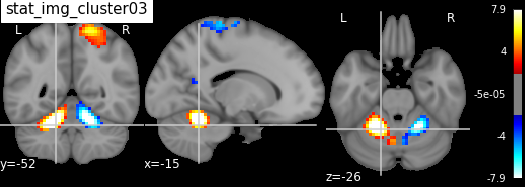

In [11]:
Image('stat_img_cluster03.png')

### Peak table

The csv file ending with `_peaks.csv` contains the location of each cluster's peak, it's signal value at this location, the cluster extend (in mm, not in number of voxels) and the atlas correspondence of the peak:

In [12]:
import pandas as pd
pd.read_csv('stat_img_peaks.csv')

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,42,-25,55,7.94135,60399,Postcentral_R,Right-Cerebral-White-Matter,48% Right_Postcentral_Gyrus; 12% Right_Precent...
1,2,-36,-25,55,-7.94144,19386,Postcentral_L,Left-Cerebral-White-Matter,30% Left_Postcentral_Gyrus; 30% Left_Precentra...
2,3,-15,-52,-26,7.94135,10260,no_label,Left-Cerebellum-Cortex,0% no_label
3,4,18,-55,-23,-7.94144,8964,Cerebelum_6_R,Right-Cerebellum-Cortex,0% no_label
4,5,-36,-19,19,-6.21808,1215,Insula_L,Unknown,37% Left_Central_Opercular_Cortex; 37% Left_In...
5,6,-6,-19,49,-5.03538,1215,Cingulate_Mid_L,ctx-lh-paracentral,50% Left_Precentral_Gyrus; 9% Left_Juxtapositi...
6,7,-30,-10,-2,-4.65454,378,Putamen_L,Left-Putamen,98% Left_Putamen
7,8,-15,-55,16,-3.57240,351,Precuneus_L,Left-Cerebral-White-Matter,35% Left_Precuneous_Cortex
8,9,-66,-25,31,3.33892,351,SupraMarginal_L,ctx-lh-supramarginal,42% Left_Supramarginal_Gyrus_anterior_division...
9,10,-21,41,46,-3.41921,162,Frontal_Sup_2_L,Unknown,51% Left_Frontal_Pole; 19% Left_Superior_Front...


### Cluster table

The csv file ending with `_clusters.csv` contains the location of each cluster's peak, the mean value within the cluster, the cluster extend (in mm, not in number of voxels), as well as the membership of each cluster, given a particular atlas.

In [13]:
pd.read_csv('stat_img_clusters.csv')

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,42,-25,55,5.71861,60399,28.39% Postcentral_R; 14.75% Precentral_R; 9.1...,31.47% Unknown; 27.09% Right-Cerebral-White-Ma...,28.07% Right_Postcentral_Gyrus; 19.18% Right_P...
1,2,-36,-25,55,-5.92288,19386,60.17% Postcentral_L; 26.32% Precentral_L; 6.2...,47.49% Left-Cerebral-White-Matter; 18.80% ctx-...,60.58% Left_Postcentral_Gyrus; 35.38% Left_Pre...
2,3,-15,-52,-26,5.28665,10260,43.68% Cerebelum_6_L; 32.63% Cerebelum_4_5_L; ...,76.05% Left-Cerebellum-Cortex; 19.21% Left-Cer...,78.16% no_label; 10.53% Left_Lingual_Gyrus; 5....
3,4,18,-55,-23,-4.93921,8964,32.53% Cerebelum_4_5_R; 31.02% Cerebelum_6_R; ...,75.60% Right-Cerebellum-Cortex; 12.95% Right-C...,81.93% no_label; 15.96% Right_Lingual_Gyrus
4,5,-36,-19,19,-4.30705,1215,71.11% Rolandic_Oper_L; 28.89% Insula_L,46.67% Unknown; 28.89% ctx-lh-supramarginal; 1...,57.78% Left_Central_Opercular_Cortex; 24.44% L...
5,6,-6,-19,49,-3.76954,1215,51.11% Cingulate_Mid_L; 37.78% Supp_Motor_Area...,40.00% ctx-lh-paracentral; 31.11% Unknown; 15....,68.89% Left_Precentral_Gyrus; 20.00% Left_Juxt...
6,7,-30,-10,-2,-3.67586,378,92.86% Putamen_L; 7.14% no_label,100.00% Left-Putamen,100.00% Left_Putamen
7,8,-15,-55,16,-3.21501,351,84.62% Precuneus_L; 7.69% Cuneus_L; 7.69% Calc...,38.46% ctx-lh-precuneus; 38.46% Left-Cerebral-...,100.00% Left_Precuneous_Cortex
8,9,-66,-25,31,3.10147,351,84.62% SupraMarginal_L; 15.38% no_label,76.92% ctx-lh-supramarginal; 23.08% Left-Cereb...,69.23% Left_Supramarginal_Gyrus_anterior_divis...
9,10,-21,41,46,-3.18072,162,100.00% Frontal_Sup_2_L,66.67% Unknown; 16.67% ctx-lh-superiorfrontal;...,66.67% Left_Frontal_Pole; 33.33% Left_Superior...


For example, in the csv table shown above, we know that 60.17% of the second cluster is in the left postcentral and 26.32% is in the left precentral area, according to the AAL atlas.

## Additional parameters

As mentioned before, `atlasreader` has many additional parameters that allow you to change the way the clusters are generated and what kind of outputs are generated. So, let's have a closer look:

- **filename**: Niimg_like  
    A 3D statistical image.
- **cluster_extent**: int  
    Minimum number of contiguous voxels required to consider a cluster in `filename`
- **atlas**: str or list, optional  
    Name of atlas(es) to consider for cluster analysis. ***Default***: `'default'`
- **voxel_thresh**: int, optional  
    Threshold to apply to `stat_img`. If a negative number is provided a
    percentile threshold is used instead, where the percentile is
    determined by the equation `100 - voxel_thresh`. ***Default***: `1.96`
- **prob_thresh**: int, optional  
    Probability (percentage) threshold to apply to `atlas`, if it is
    probabilistic. ***Default***: `5`
- **min_distance**: float, optional  
    Specifies the minimum distance (in mm) required between sub-peaks in a
    cluster. If None, sub-peaks will not be examined and only the primary
    cluster peak will be reported. ***Default***: `None`
- **outdir**: str or None, optional  
    Path to desired output directory. If None, generated files will be
    saved to the same folder as `filename`. ***Default***: `None`
- **glass_plot_kws**: dict or None, optional  
    Additional keyword arguments to pass to `nilearn.plotting.plot_glass_brain`.
- **stat_plot_kws**: dict or None, optional  
    Additional keyword arguments to pass to `nilearn.plotting.plot_stat_map`.
    
The first two, we've already used in the previous example, but let's take a closer look at the others.

### `atlas` and `voxel_thresh`

First, let's change the **atlas** and the **voxel_thresh** parameters:

In [14]:
create_output(file_name, cluster_extent=5,
              atlas=['destrieux', 'marsatlas'],
              voxel_thresh=6)

As you can see, the usage of a higher voxel threshold created smaller clusters and caused the clusters with below threshold voxels to disapear.

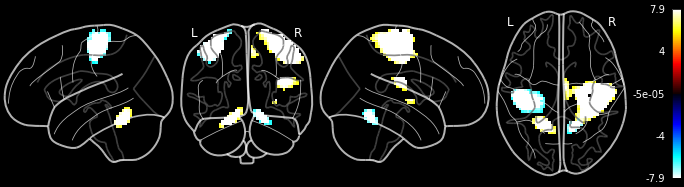

In [15]:
Image('stat_img.png')

Additionally, the csv files now contain the information about the `destrieux` and `marsatlas`.

In [16]:
pd.read_csv('stat_img_clusters.csv')

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,destrieux,marsatlas
0,1,42,-25,58,7.62272,22869,33.06% Right-Cerebral-White-Matter; 31.17% Unk...,65.41% no_label; 13.34% Right_Dorsolateral_Som...
1,2,-36,-25,55,-7.61916,9639,49.86% Left-Cerebral-White-Matter; 18.77% Unkn...,66.67% no_label; 13.73% Left_Dorsolateral_Soma...
2,3,-15,-52,-26,7.39954,3429,82.68% Left-Cerebellum-Cortex; 17.32% Left-Cer...,100.00% no_label
3,4,45,-19,16,7.30833,2754,44.12% Unknown; 17.65% ctx_rh_G_and_S_subcentr...,53.92% no_label; 34.31% Right_Ventral_Inferior...
4,5,18,-55,-23,-7.25811,2133,94.94% Right-Cerebellum-Cortex; 5.06% Right-Ce...,100.00% no_label
5,6,6,-10,52,6.78709,1053,38.46% ctx_rh_G_front_sup; 23.08% Unknown; 20....,35.90% no_label; 30.77% Right_Dorsomedial_Moto...
6,7,33,-7,-2,6.74001,243,100.00% Right-Putamen,100.00% Right_Puttamen


**Note**: The three atlases from the previous example, `aal`, `desikan_killiany`, `harvard_oxford` are the **default** atlases, which can either be specified with `atlas='default'`, `atlas=['aal', 'desikan_killiany', 'harvard_oxford']` or by just omitting the `atlas` parameter.

If a negative number is provided for `voxel_thresh`, a percentile threshold is used instead, where the percentile is determined by the equation `100 - voxel_thresh`. So, let's threshold the data at 99%.

In [19]:
create_output(file_name, cluster_extent=5,
              voxel_thresh=-1)

/home/line/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


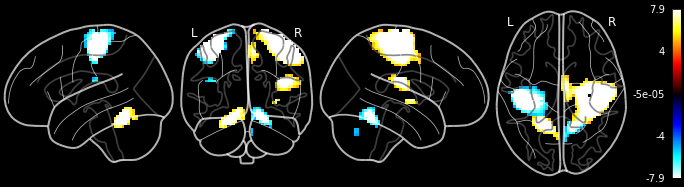

In [20]:
Image('stat_img.png')

**Note:** This percentage term is misleading if the statistical images contains negative values. For example, 99% in the above example, is the 99 percentile of all values between -7.9 to 7.9.

In [21]:
pd.read_csv('stat_img_clusters.csv')

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,42,-25,58,7.19965,28215,50.91% Postcentral_R; 28.33% Precentral_R; 6.8...,34.16% Right-Cerebral-White-Matter; 29.67% Unk...,48.33% Right_Postcentral_Gyrus; 29.47% Right_P...
1,2,-36,-25,55,-7.13494,12285,64.40% Postcentral_L; 32.53% Precentral_L,48.79% Left-Cerebral-White-Matter; 18.02% ctx-...,63.30% Left_Postcentral_Gyrus; 36.48% Left_Pre...
2,3,-15,-52,-26,6.70928,5265,43.59% Cerebelum_6_L; 38.97% Cerebelum_4_5_L; ...,79.49% Left-Cerebellum-Cortex; 20.00% Left-Cer...,88.72% no_label; 5.13% Left_Lingual_Gyrus
3,4,45,-19,16,6.55843,4509,63.47% Rolandic_Oper_R; 14.97% Insula_R; 8.98%...,44.31% Unknown; 29.34% ctx-rh-supramarginal; 1...,37.72% Right_Parietal_Operculum_Cortex; 37.13%...
4,5,18,-55,-23,-6.41416,3834,48.59% Cerebelum_4_5_R; 39.44% Cerebelum_6_R,82.39% Right-Cerebellum-Cortex; 9.15% Right-Ce...,87.32% no_label; 11.97% Right_Lingual_Gyrus
5,6,6,-10,52,5.88783,2970,64.55% Supp_Motor_Area_R; 35.45% Cingulate_Mid_R,38.18% ctx-rh-paracentral; 33.64% Unknown; 17....,60.91% Right_Juxtapositional_Lobule_Cortex_(fo...
6,7,33,-7,-2,6.20878,405,86.67% Putamen_R; 6.67% Pallidum_R; 6.67% no_l...,100.00% Right-Putamen,80.00% Right_Putamen; 20.00% Right_Insular_Cortex
7,8,-36,-19,19,-5.61900,297,63.64% Rolandic_Oper_L; 36.36% Insula_L,45.45% Unknown; 27.27% ctx-lh-postcentral; 18....,90.91% Left_Central_Opercular_Cortex; 9.09% Le...
8,9,6,-70,-38,-5.08795,162,100.00% Vermis_8,100.00% Right-Cerebellum-Cortex,100.00% no_label


### `prob_thresh`

The **prob_thresh** pramameter can be used to restrict the information in the **cluster table** to a given probability value. This will only influence the information in the table, but won't change the cluster size or any other outcome.

So let's take again an example from before and set the probability threshold to 33%

In [22]:
create_output(file_name, cluster_extent=5,
              prob_thresh=33.0)

As you can see, the **cluster** table has now fewer entries in the atlas column, as atlas corresponances below 33% where omitted. Be carefull, if this threshold is set to high, no atlas corresponance will survive. In which case the entry is replaces by `NaN`.

In [23]:
pd.read_csv('stat_img_clusters.csv')

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1,42,-25,55,5.71861,60399,NaN,NaN,NaN
1,2,-36,-25,55,-5.92288,19386,60.17% Postcentral_L,47.49% Left-Cerebral-White-Matter,60.58% Left_Postcentral_Gyrus; 35.24% Left_Pre...
2,3,-15,-52,-26,5.28665,10260,43.68% Cerebelum_6_L,76.05% Left-Cerebellum-Cortex,78.16% no_label
3,4,18,-55,-23,-4.93921,8964,NaN,75.60% Right-Cerebellum-Cortex,81.93% no_label
4,5,-36,-19,19,-4.30705,1215,71.11% Rolandic_Oper_L,46.67% Unknown,57.78% Left_Central_Opercular_Cortex
5,6,-6,-19,49,-3.76954,1215,51.11% Cingulate_Mid_L; 37.78% Supp_Motor_Area_L,40.00% ctx-lh-paracentral,68.89% Left_Precentral_Gyrus
6,7,-30,-10,-2,-3.67586,378,92.86% Putamen_L,100.00% Left-Putamen,100.00% Left_Putamen
7,8,-15,-55,16,-3.21501,351,84.62% Precuneus_L,38.46% ctx-lh-precuneus; 38.46% Left-Cerebral-...,100.00% Left_Precuneous_Cortex
8,9,-66,-25,31,3.10147,351,84.62% SupraMarginal_L,76.92% ctx-lh-supramarginal,69.23% Left_Supramarginal_Gyrus_anterior_division
9,10,-21,41,46,-3.18072,162,100.00% Frontal_Sup_2_L,66.67% Unknown,66.67% Left_Frontal_Pole; 33.33% Left_Superior...


### `min_distance`

By default, `atlasreader` only shows information of the main peak in the **peak table**. But some clusters might be rather big with many different peaks. If you also want to extract peak information of other peaks within a given cluster, you can use the `min_distance` paramter. This parameter specifies the minimum distance required between sub-peaks in a cluster.

To better illustrate this example, let's focus only on the big four cluster in our dataset (i.e. we will set `cluster_extent=100`).

In [24]:
create_output(file_name, cluster_extent=100,
              atlas='aal',
              min_distance=10)

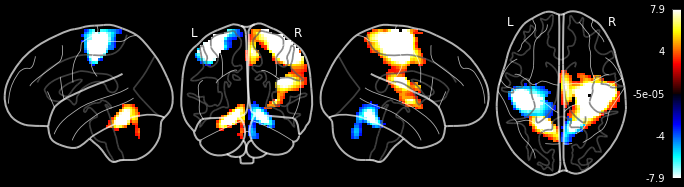

In [25]:
Image('stat_img.png')

Setting the minimum distance between peaks to 10, means that the **peak table** will now include multiple peaks withini a cluster, if they have a euclidean distance of at least 10mm.

In [26]:
pd.read_csv('stat_img_peaks.csv')

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal
0,1,6,-10,52,7.94135,60399,Supp_Motor_Area_R
1,1,45,-19,16,7.94135,60399,Rolandic_Oper_R
2,1,42,-25,58,7.94135,60399,Postcentral_R
3,1,33,-7,-2,7.90531,60399,Putamen_R
4,1,42,-1,13,5.47070,60399,Rolandic_Oper_R
5,1,9,2,73,3.56015,60399,Supp_Motor_Area_R
6,2,-30,-19,67,-7.94144,19386,Precentral_L
7,2,-36,-25,55,-7.94144,19386,Postcentral_L
8,3,-15,-52,-26,7.94135,10260,no_label
9,3,-6,-70,-38,4.26074,10260,Cerebelum_8_L


**Note**: The usage of the `min_distance` parameter has only an effect on the **peak table**, and will not influence any other output file.

### `outdir`

The **outdir** parameter allows you to store the output files of `atlasreader` at a particular location. If none is specified, then `atlasreader` will store the results at the same location, as the input image.

As an example, let's store the output at `/tmp/example`:

In [27]:
create_output(file_name, cluster_extent=100,
              outdir='/tmp/example')

In [28]:
ls /tmp/example/

stat_img_cluster01.png  stat_img_cluster04.png  stat_img.png
stat_img_cluster02.png  stat_img_clusters.csv
stat_img_cluster03.png  stat_img_peaks.csv


### `glass_plot_kws` and `stat_plot_kws`

The last two parameters allow you to adjust the style of the output plots. Let's say that we want to tweak the default plotting style to have a white background, or adjust the colormap used to convey the clusters. This customization is done separately for the glass brain plot and the cluster plots using the `_kws` arguments in `create_output`. These parameters are dictionaries that contain keyword arguments for the `nilearn` functions used to create these plots (see the keyword arguments for [plot_glass_brain](http://nilearn.github.io/modules/generated/nilearn.plotting.plot_glass_brain.html#nilearn.plotting.plot_glass_brain) and [plot_stat_map](http://nilearn.github.io/modules/generated/nilearn.plotting.plot_stat_map.html#nilearn.plotting.plot_stat_map)).

For example:

In [29]:
create_output(file_name, cluster_extent=100,
              glass_plot_kws={'black_bg': False, 'vmax': 20, 'colorbar': False},
              stat_plot_kws={'black_bg': False, 'title': None})

This sets the background color to white, sets the maximum value of the colorbar to 20 and removes the colorbar from the overview plot.

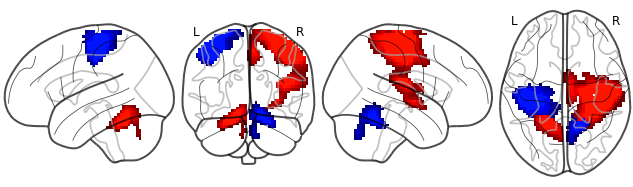

In [30]:
Image('stat_img.png')

The cluster specific plots also have now a white background and the image title is removed from the figure.

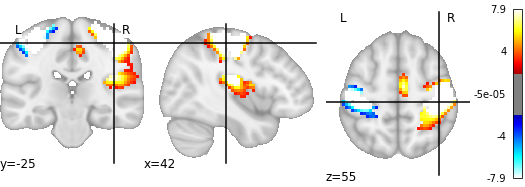

In [31]:
# Title is now removed for all cluster plots
Image('stat_img_cluster01.png')

## Calling `atlasreader` from the Command Line

This is all super exciting! But as promised before, `atlasreader` can also be run directly from the command line. Assuming you installed it via `pip`.

Let's begin with running the `help` argument so we can look at the input parameters.

In [32]:
%%bash
atlasreader -h 

The Python package you are importing, `atlasreader`, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using `atlasreader`, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data

usage: atlasreader [-h] [-a atlas [atlas ...]] [-t threshold] [-p threshold]
                   [-o outdir] [-d distance]
                   file min_cluster_size

positional arguments:
  file                  The full or relative path to the statistical map from
                        which cluster information should be extracted.
  min_cluster_size      Number of contiguous voxels required for a cluster to
                        be considered for analysis.

optional arguments:
  -h, --help            show this help message and exit
  -a atlas [atlas ...], --atlas atlas [atlas ...]
                   

**Perfect!** As you can see, first, we have again the information about the license terms, followed by the description of the software. The parameters that you can specify are the same input parameters as if we would run `atlasreader` within Python.

So let's try it out. Let's say we want to set the **probability threshold** to `20%` to remove small probabilities, use `all` **atlases** to extract information from, **threshold** the image at `3` and only keep clusters with more than `10` voxels:

In [33]:
%%bash
atlasreader -a all -t 3 -p 20 stat_img.nii.gz 10

The Python package you are importing, `atlasreader`, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using `atlasreader`, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data



The overview plot and cluster specific plots look similiar to what we saw before. Great!

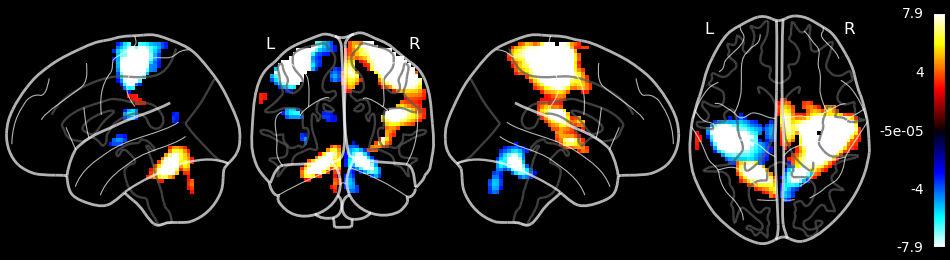

In [34]:
Image('stat_img.png')

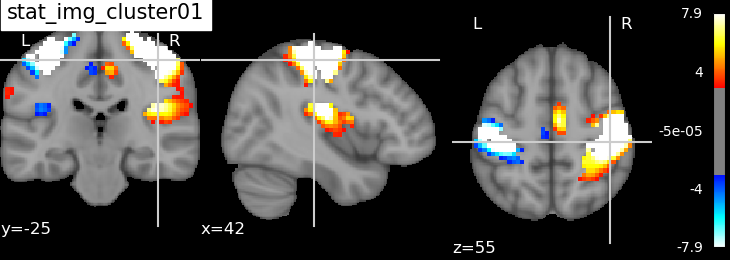

In [35]:
Image('stat_img_cluster01.png')

But because we set `atlas` to `all` we now have much more information in the **peak** and **cluster tables** (you need to scroll to the right to see all of them).

In [36]:
pd.read_csv('stat_img_peaks.csv')

,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,aicha,desikan_killiany,destrieux,harvard_oxford,juelich,marsatlas,neuromorphometrics,talairach_ba,talairach_gyrus
0,1,42,-25,55,7.94135,60399,Postcentral_R,S_Rolando-3-R,Right-Cerebral-White-Matter,Right-Cerebral-White-Matter,48% Right_Postcentral_Gyrus,90% GM_Primary_somatosensory_cortex_BA3b_R; 27...,no_label,Right_Cerebral_White_Matter,Background,Postcentral_Gyrus
1,2,-36,-25,55,-7.94144,19386,Postcentral_L,S_Rolando-3-L,Left-Cerebral-White-Matter,Left-Cerebral-White-Matter,30% Left_Postcentral_Gyrus; 30% Left_Precentra...,37% GM_Primary_motor_cortex_BA4p_L; 34% GM_Pri...,Left_Dorsolateral_Motor_Cortex(BA_4),Left_PrG_precentral_gyrus,Brodmann_area_4,Precentral_Gyrus
2,3,-15,-52,-26,7.94135,10260,no_label,no_label,Left-Cerebellum-Cortex,Left-Cerebellum-Cortex,0% no_label,0% no_label,no_label,Left_Cerebellum_White_Matter,Dentate,Background
3,4,18,-55,-23,-7.94144,8964,Cerebelum_6_R,no_label,Right-Cerebellum-Cortex,Right-Cerebellum-Cortex,0% no_label,0% no_label,no_label,Right_Cerebellum_Exterior,Dentate,Background
4,5,-36,-19,19,-6.21808,1215,Insula_L,G_Insula-posterior-1-L,Unknown,Unknown,37% Left_Central_Opercular_Cortex; 37% Left_In...,70% GM_Secondary_somatosensory_cortex_/_Pariet...,Left_Ventral_Inferior_Parietal_Cortex(BA_40),Left_CO_central_operculum,Brodmann_area_13,Insula
5,6,-6,-19,49,-5.03538,1215,Cingulate_Mid_L,G_Paracentral_Lobule-1-L,ctx-lh-paracentral,ctx_lh_G_front_sup,50% Left_Precentral_Gyrus,48% GM_Premotor_cortex_BA6_L; 47% GM_Primary_m...,no_label,Left_MPrG_precentral_gyrus_medial_segment,Background,Medial_Frontal_Gyrus
6,7,-30,-10,-2,-4.65454,378,Putamen_L,N_Putamen-3-L,Left-Putamen,Left-Putamen,98% Left_Putamen,0% no_label,Left_Puttamen,Left_Putamen,Putamen,Lentiform_Nucleus
7,8,-15,-55,16,-3.57240,351,Precuneus_L,G_Precuneus-1-L,Left-Cerebral-White-Matter,Left-Cerebral-White-Matter,35% Left_Precuneous_Cortex,29% WM_Callosal_body,Left_Cuneus(BA_18/19),Left_PCu_precuneus,Background,Posterior_Cingulate
8,9,-66,-25,31,3.33892,351,SupraMarginal_L,G_Supramarginal-3-L,ctx-lh-supramarginal,ctx_lh_G_pariet_inf-Supramar,42% Left_Supramarginal_Gyrus_anterior_division...,30% GM_Inferior_parietal_lobule_PF_L; 22% GM_S...,Left_Ventral_Inferior_Parietal_Cortex(BA_40),Left_SMG_supramarginal_gyrus,Background,Background


In [37]:
pd.read_csv('stat_img_clusters.csv')

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,aicha,desikan_killiany,destrieux,harvard_oxford,juelich,marsatlas,neuromorphometrics,talairach_ba,talairach_gyrus
0,1,42,-25,55,5.71861,60399,28.39% Postcentral_R,NaN,31.47% Unknown; 27.09% Right-Cerebral-White-Ma...,31.47% Unknown; 27.09% Right-Cerebral-White-Ma...,28.07% Right_Postcentral_Gyrus,28.12% GM_Premotor_cortex_BA6_R,56.01% no_label,NaN,65.13% Background,23.96% Postcentral_Gyrus; 22.71% Background
1,2,-36,-25,55,-5.92288,19386,60.17% Postcentral_L; 26.32% Precentral_L,29.39% S_Rolando-4-L; 28.83% S_Rolando-3-L,47.49% Left-Cerebral-White-Matter,47.49% Left-Cerebral-White-Matter,60.58% Left_Postcentral_Gyrus; 35.38% Left_Pre...,22.98% GM_Primary_somatosensory_cortex_BA1_L; ...,67.83% no_label,48.33% Left_PoG_postcentral_gyrus; 24.51% Left...,64.35% Background,42.20% Postcentral_Gyrus; 33.01% Background; 2...
2,3,-15,-52,-26,5.28665,10260,43.68% Cerebelum_6_L; 32.63% Cerebelum_4_5_L,100.00% no_label,76.05% Left-Cerebellum-Cortex,76.05% Left-Cerebellum-Cortex,78.16% no_label,100.00% no_label,100.00% no_label,66.05% Left_Cerebellum_Exterior; 20.79% Left_C...,86.32% Background,33.16% Background; 27.37% Culmen; 20.79% Declive
3,4,18,-55,-23,-4.93921,8964,32.53% Cerebelum_4_5_R; 31.02% Cerebelum_6_R,100.00% no_label,75.60% Right-Cerebellum-Cortex,75.60% Right-Cerebellum-Cortex,81.93% no_label,99.10% no_label,100.00% no_label,66.57% Right_Cerebellum_Exterior,85.54% Background,32.23% Background; 29.52% Culmen
4,5,-36,-19,19,-4.30705,1215,71.11% Rolandic_Oper_L; 28.89% Insula_L,100.00% G_Insula-posterior-1-L,46.67% Unknown; 28.89% ctx-lh-supramarginal,46.67% Unknown,57.78% Left_Central_Opercular_Cortex; 24.44% L...,44.44% GM_Secondary_somatosensory_cortex_/_Par...,55.56% Left_Ventral_Inferior_Parietal_Cortex(B...,46.67% Left_CO_central_operculum; 31.11% Left_...,62.22% Background; 35.56% Brodmann_area_13,77.78% Insula
5,6,-6,-19,49,-3.76954,1215,51.11% Cingulate_Mid_L; 37.78% Supp_Motor_Area_L,62.22% G_Paracentral_Lobule-1-L; 22.22% S_Cing...,40.00% ctx-lh-paracentral; 31.11% Unknown,40.00% ctx_lh_G_front_sup; 31.11% Unknown,68.89% Left_Precentral_Gyrus; 20.00% Left_Juxt...,77.78% GM_Premotor_cortex_BA6_L; 20.00% GM_Pri...,37.78% no_label; 35.56% Left_Dorsomedial_Motor...,48.89% Left_MPrG_precentral_gyrus_medial_segme...,46.67% Brodmann_area_6; 40.00% Background,60.00% Medial_Frontal_Gyrus; 40.00% Paracentra...
6,7,-30,-10,-2,-3.67586,378,92.86% Putamen_L,100.00% N_Putamen-3-L,100.00% Left-Putamen,100.00% Left-Putamen,100.00% Left_Putamen,64.29% GM_Insula_Id1_L; 21.43% no_label,100.00% Left_Puttamen,64.29% Left_Putamen; 35.71% Left_Cerebral_Whit...,64.29% Background; 35.71% Putamen,64.29% Extra-Nuclear; 35.71% Lentiform_Nucleus
7,8,-15,-55,16,-3.21501,351,84.62% Precuneus_L,84.62% G_Precuneus-1-L,38.46% ctx-lh-precuneus; 38.46% Left-Cerebral-...,38.46% Left-Cerebral-White-Matter; 23.08% ctx_...,100.00% Left_Precuneous_Cortex,38.46% WM_Callosal_body; 38.46% no_label,30.77% Left_Cuneus(BA_18/19); 30.77% no_label;...,92.31% Left_PCu_precuneus,100.00% Background,84.62% Posterior_Cingulate
8,9,-66,-25,31,3.10147,351,84.62% SupraMarginal_L,69.23% G_Supramarginal-3-L,76.92% ctx-lh-supramarginal; 23.08% Left-Cereb...,76.92% ctx_lh_G_pariet_inf-Supramar; 23.08% Le...,69.23% Left_Supramarginal_Gyrus_anterior_divis...,61.54% GM_Inferior_parietal_lobule_PF_L; 23.08...,53.85% no_label; 46.15% Left_Ventral_Inferior_...,69.23% Left_SMG_supramarginal_gyrus; 23.08% no...,76.92% Background,61.54% Background; 23.08% Postcentral_Gyrus


## `queryatlas`

Last but certainly not least: If you install `atlasreader` via `pip`, then you will also have access to the `queryatlas` tool. This command line interface is based on the main functions in `atlasreader` and allows you to get the **atlas information** at a particular location.

Let's for example say, we want to know which atlas corresponance the MNI coordinate 32.3, -14.8, -18.5 has:

In [38]:
%%bash
queryatlas 32.3 -14.8 -18.5

The Python package you are importing, `atlasreader`, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using `atlasreader`, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data

Atlas                     Label                    
==========                ==========               
aal                       Hippocampus_R
aicha                     G_Temporal_Pole_Mid-3-R
desikan_killiany          Right-Hippocampus
destrieux                 Right-Hippocampus
harvard_oxford            93% Right_Hippocampus
juelich                   90% GM_Hippocampus_cornu_ammonis_R
                          72% GM_Hippocampus_dentate_gyrus_R
                          12% GM_Hippocampus_subiculum_R
marsatlas                 Right_Hippocampus
neuromorphometrics        Right_Hippocampus
talairach_ba  

As before, you first get again the license term information, followed by the atlas name and the corresponding label at the given location.

As before, `queryatlas` gives you also some optional parameters. Use the `-h` flag to see them:

In [39]:
%%bash
queryatlas -h

The Python package you are importing, `atlasreader`, is licensed under the
BSD-3 license; however, the atlases it uses are separately licensed under more
restrictive frameworks.
By using `atlasreader`, you agree to abide by the license terms of the
individual atlases. Information on these terms can be found online at:
https://github.com/miykael/atlasreader/tree/master/atlasreader/data

usage: queryatlas [-h] [-a atlas [atlas ...]] [-p threshold]
                  coordinate coordinate coordinate

positional arguments:
  coordinate            The coordinate (in MNI space) for which to query
                        atlases. Should be provided as space-delimited x y z
                        coordinates, e.g., -10.5 -30.0 15.3.

optional arguments:
  -h, --help            show this help message and exit
  -a atlas [atlas ...], --atlas atlas [atlas ...]
                        Atlas(es) to use for examining anatomical delineation
                        of clusters in provided statistical 